<a href="https://colab.research.google.com/github/diyadoshi661/UserAuthentication-MouseDynamics/blob/main/Mouse_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import json
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
# It goes inside the 'training_files' directory and stores all the data into a list
list_directory = os.listdir('/content/drive/My Drive/MachineLearning/Colab/Mouse-Dynamics/training_files')
list_directory
'''

['user15',
 'user16',
 'user23',
 'user7',
 'user9',
 'user21',
 'user35',
 'user12',
 'user20',
 'user29']

In [ ]:
training_folder_path = '/content/drive/My Drive/MachineLearning/Colab/Mouse-Dynamics/training_files'


all_users_data = []

# Goes to the 'training_files' and gets access to all sub-folders in the 'training_files' folder
user_folders = os.listdir(training_folder_path)

for user_folder in user_folders:
    # since we don't want the paths to be hard coded, we use join method
    user_folder_path = os.path.join(training_folder_path, user_folder)

    # the session file is a csv file
    session_files = os.listdir(user_folder_path)

    for session_file in session_files:
        session_file_path = os.path.join(user_folder_path, session_file)

        data = pd.read_csv(session_file_path)

        data['user'] = user_folder

        # Append this session's data to the overall list
        # appends each user's data to the list, i.e. it first appends user 1, then user 2, and so on
        all_users_data.append(data)


# It generates a DataFrame out of the list
all_users_data_df = pd.concat(all_users_data, ignore_index=True)

all_users_data_df


,record timestamp,client timestamp,button,state,x,y,user
0,0.000,0.000,NoButton,Move,558,593,user15
1,0.166,0.094,NoButton,Move,580,559,user15
2,0.827,0.843,NoButton,Move,586,554,user15
3,1.152,0.936,NoButton,Move,1252,230,user15
4,1.363,1.170,NoButton,Move,1919,111,user15
...,...,...,...,...,...,...,...
2253811,7344.502,7344.543,NoButton,Move,623,307,user29
2253812,7344.603,7344.652,NoButton,Move,594,302,user29
2253813,7344.768,7344.808,NoButton,Move,593,301,user29
2253814,7344.768,7344.808,Left,Pressed,593,301,user29


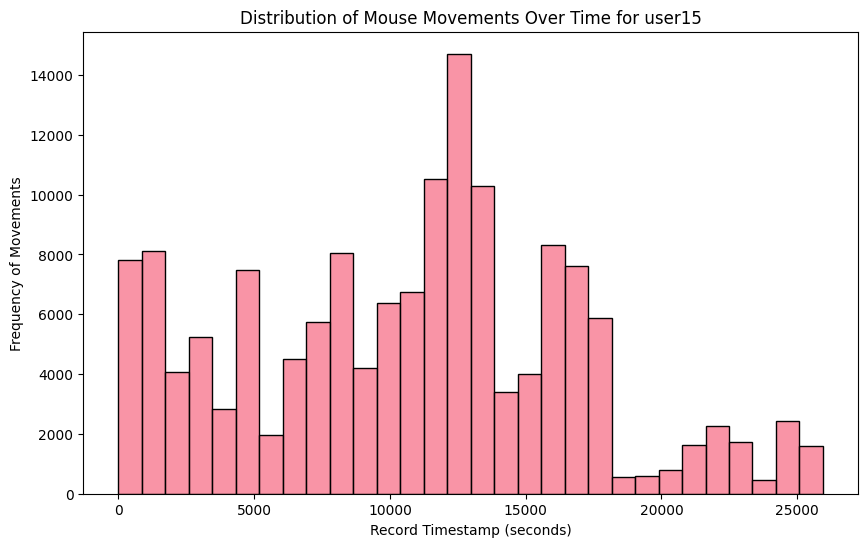

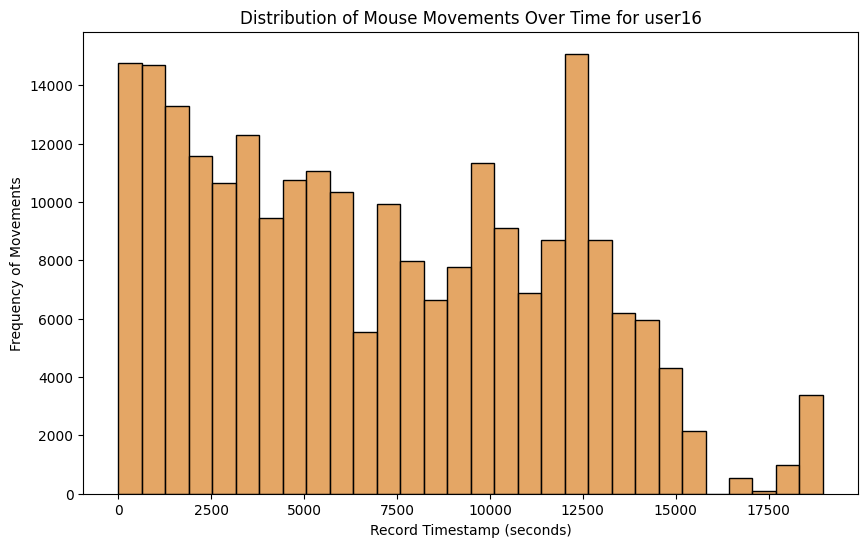

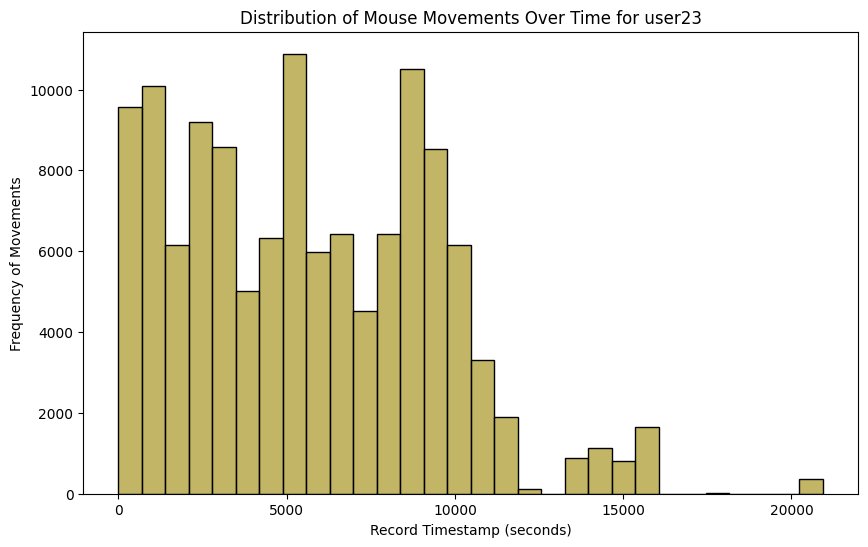

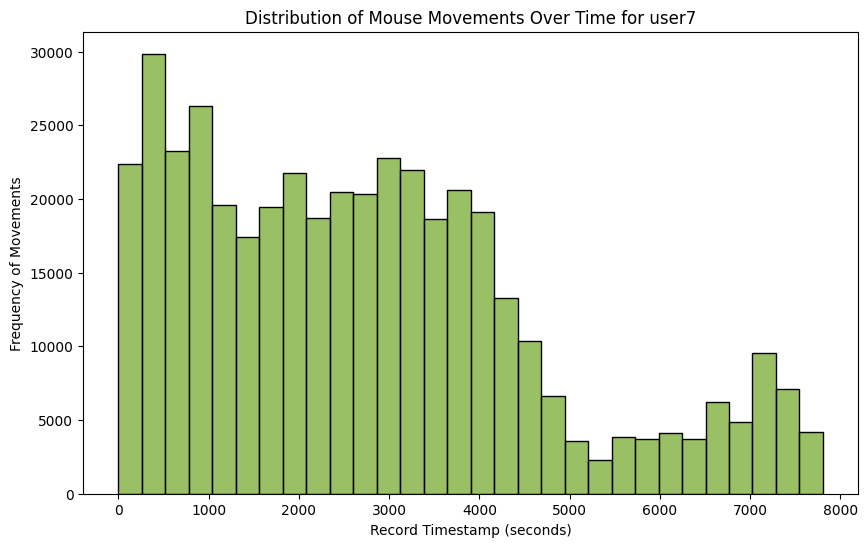

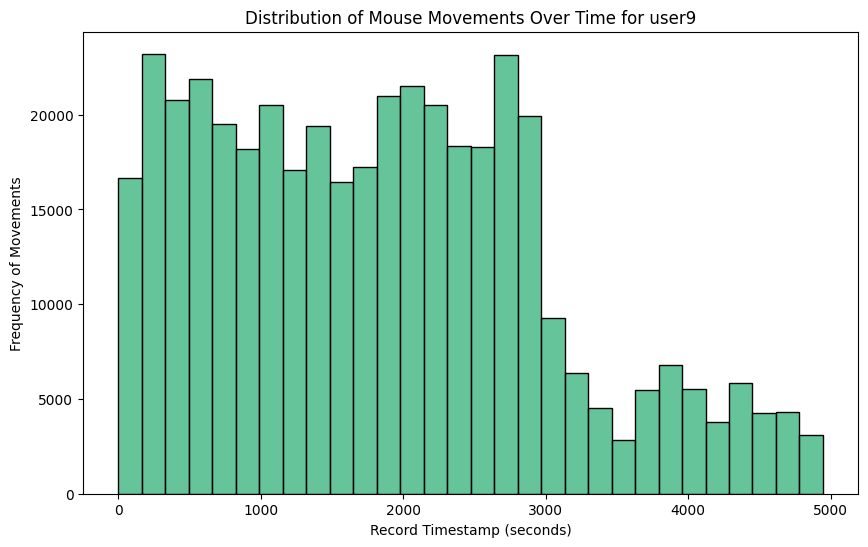

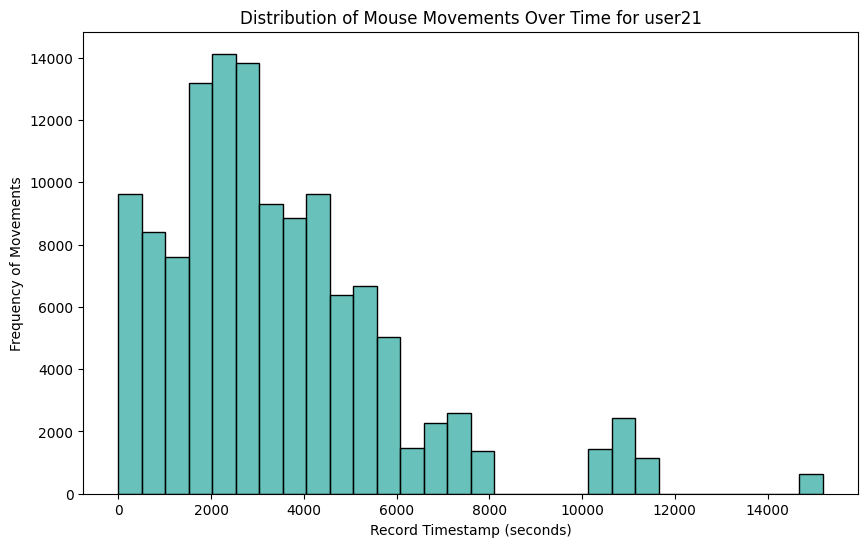

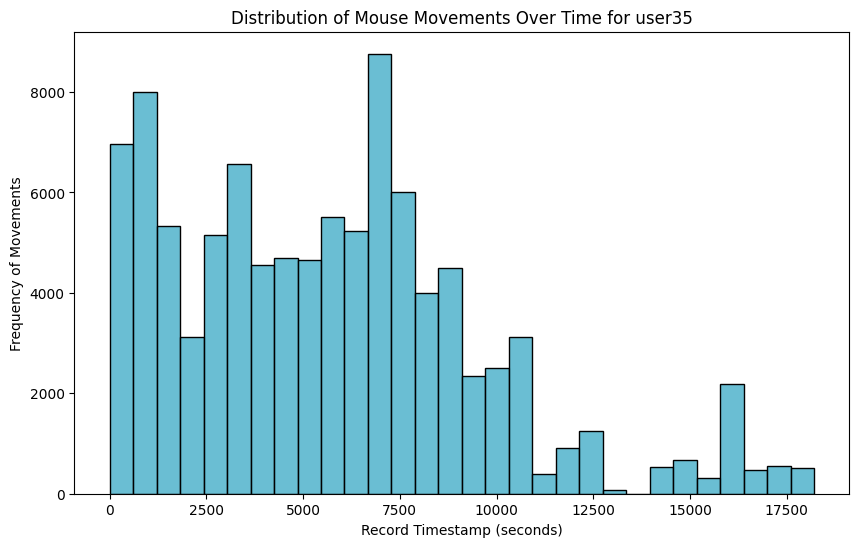

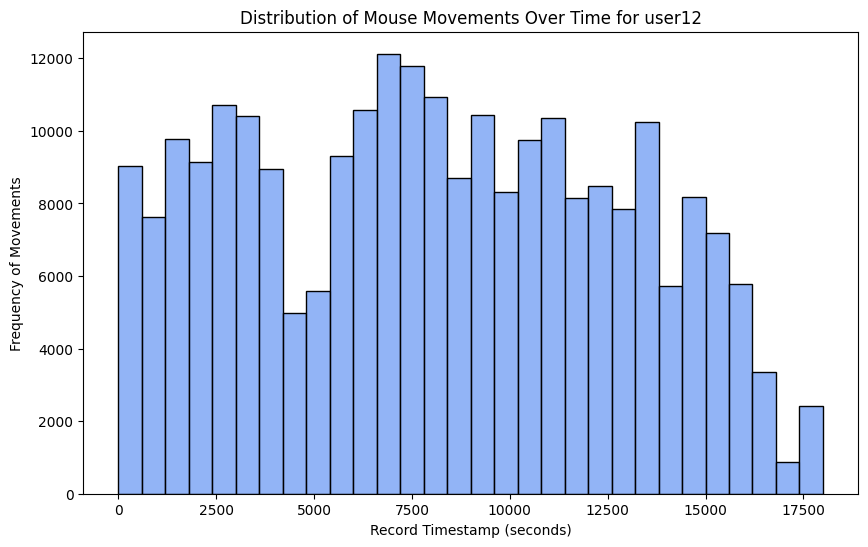

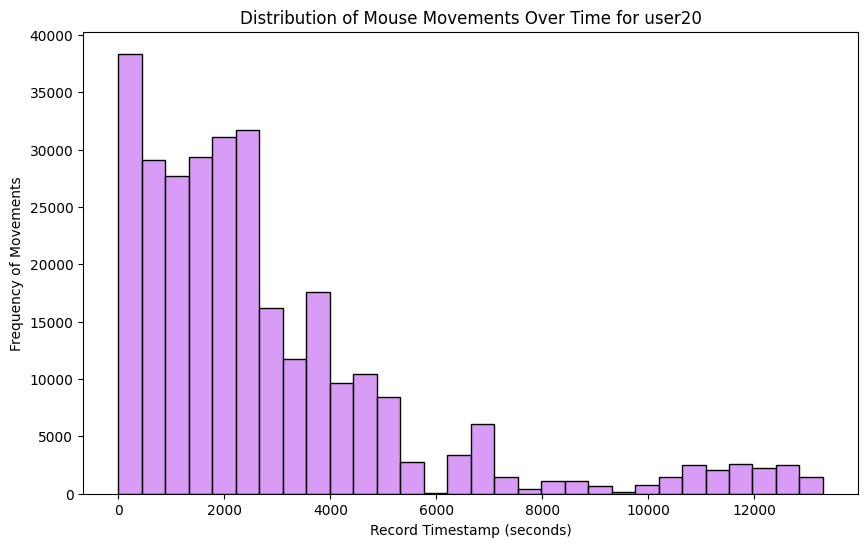

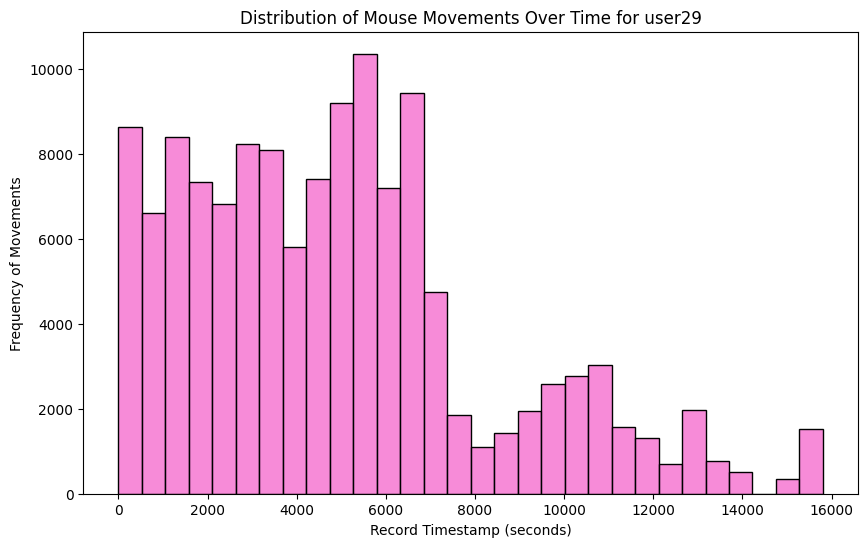

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of colors to cycle through for each user plot
colors = sns.color_palette("husl", n_colors=len(all_users_data_df['user'].unique()))

# Plotting histogram for movement over time for each user with a unique color
for i, user in enumerate(all_users_data_df['user'].unique()):
    user_data = all_users_data_df[all_users_data_df['user'] == user]

    plt.figure(figsize=(10, 6))
    sns.histplot(user_data['record timestamp'], bins=30, color=colors[i])
    plt.xlabel('Record Timestamp (seconds)')
    plt.ylabel('Frequency of Movements')
    plt.title(f'Distribution of Mouse Movements Over Time for {user}')
    plt.show()


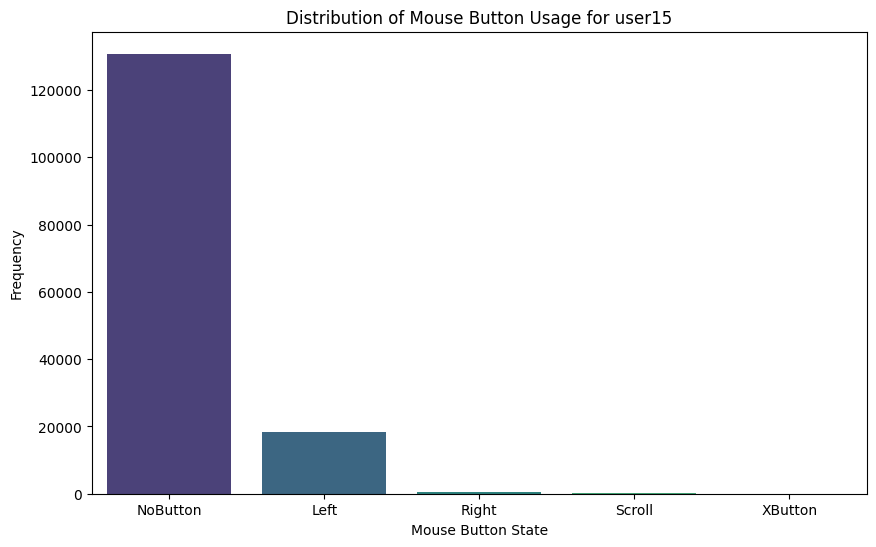

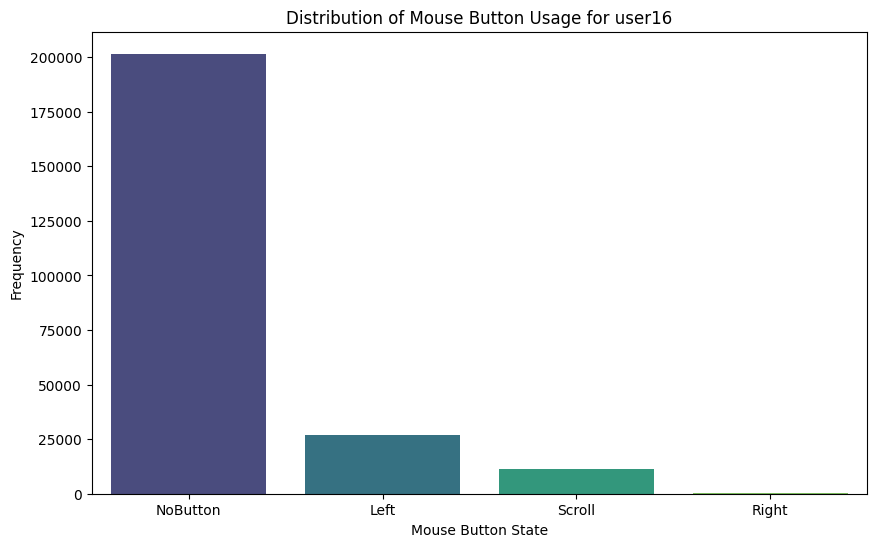

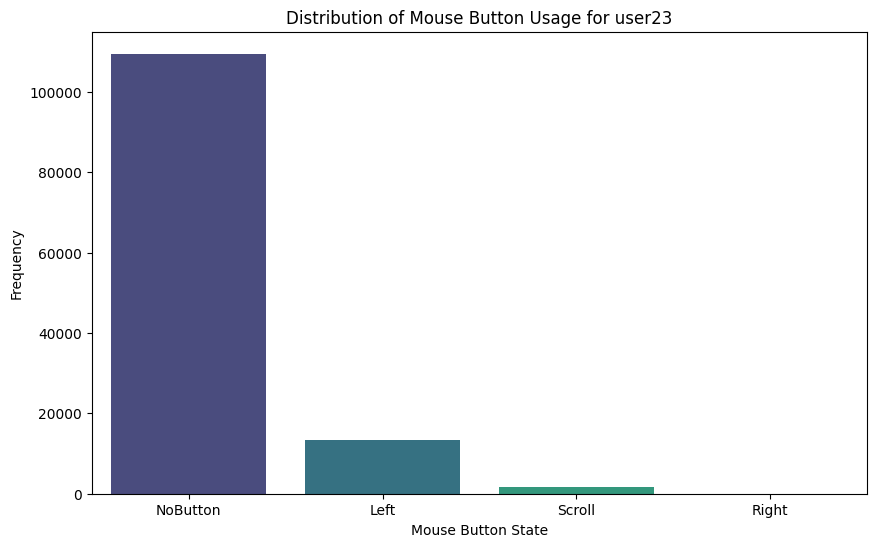

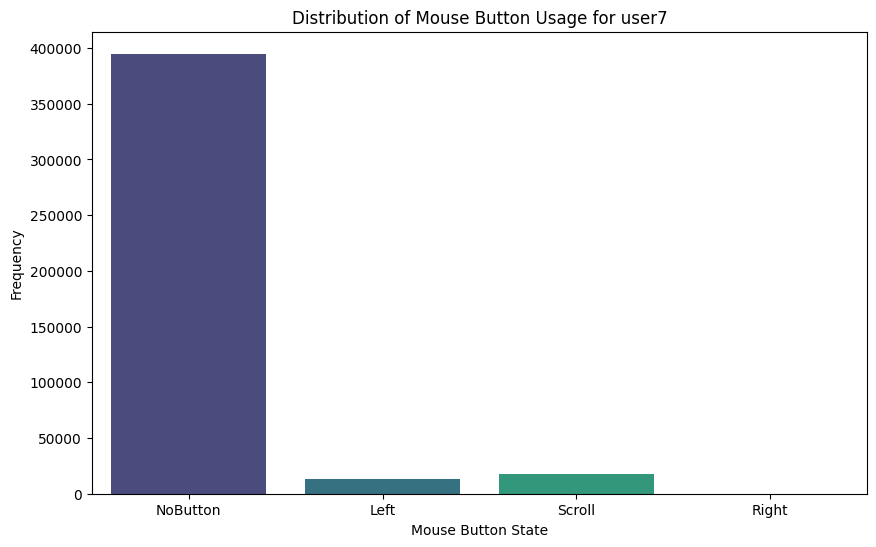

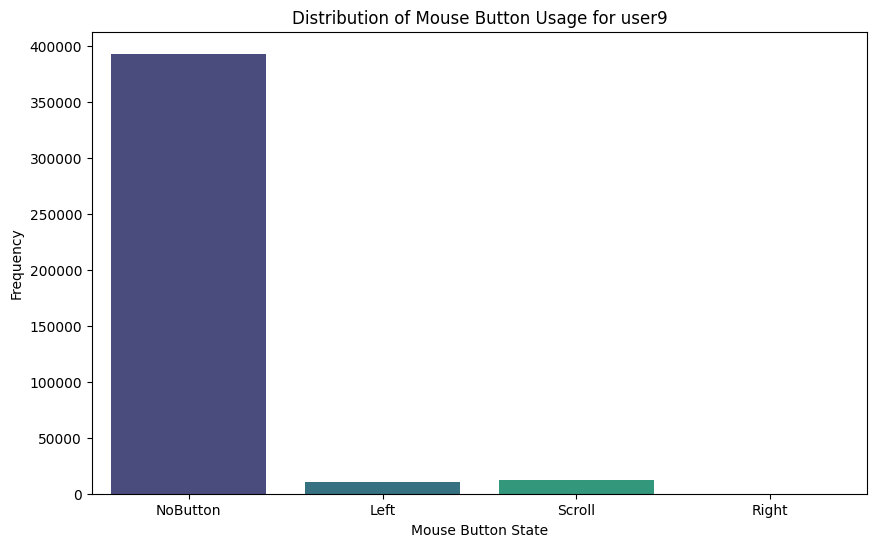

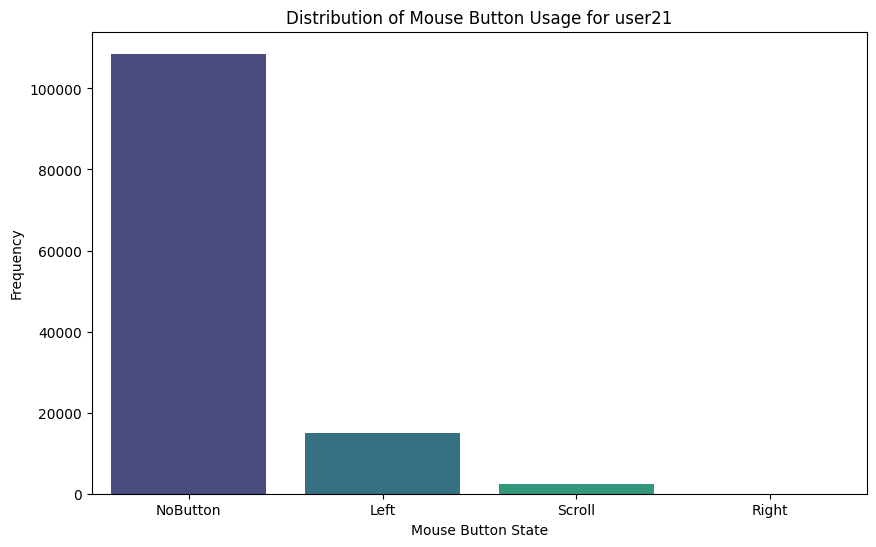

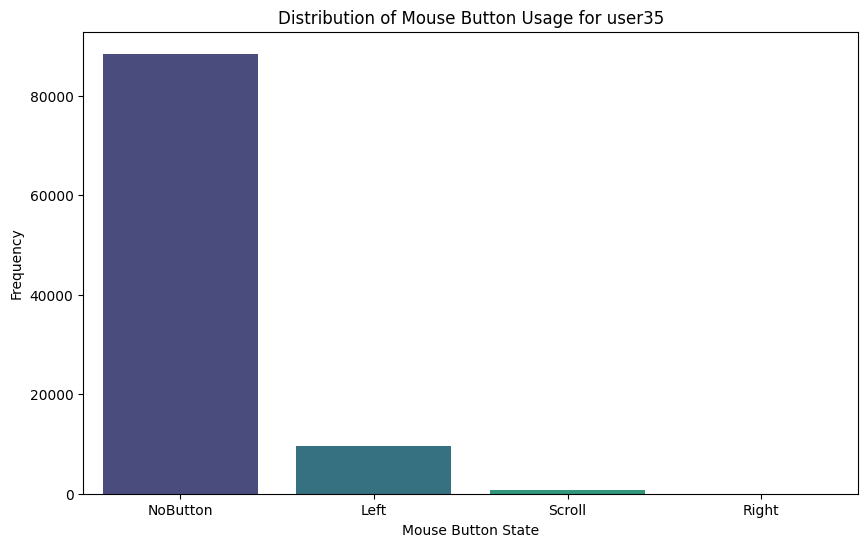

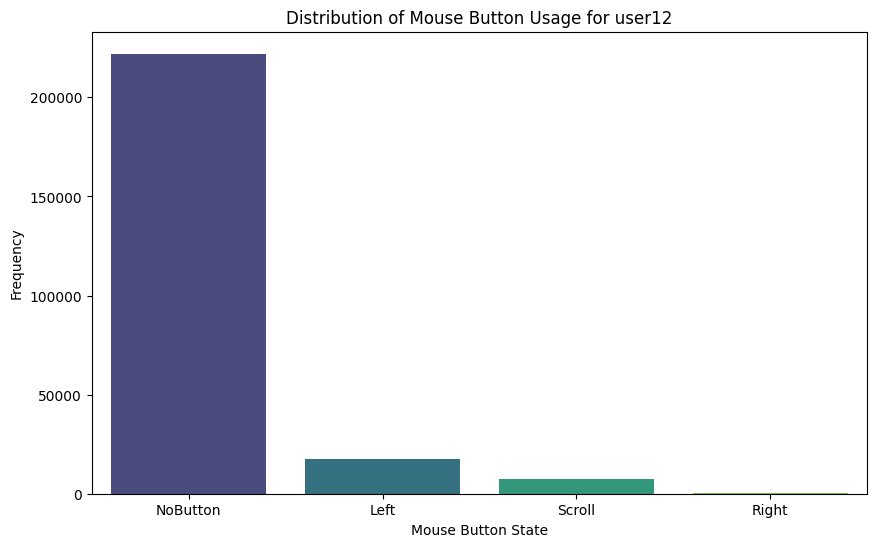

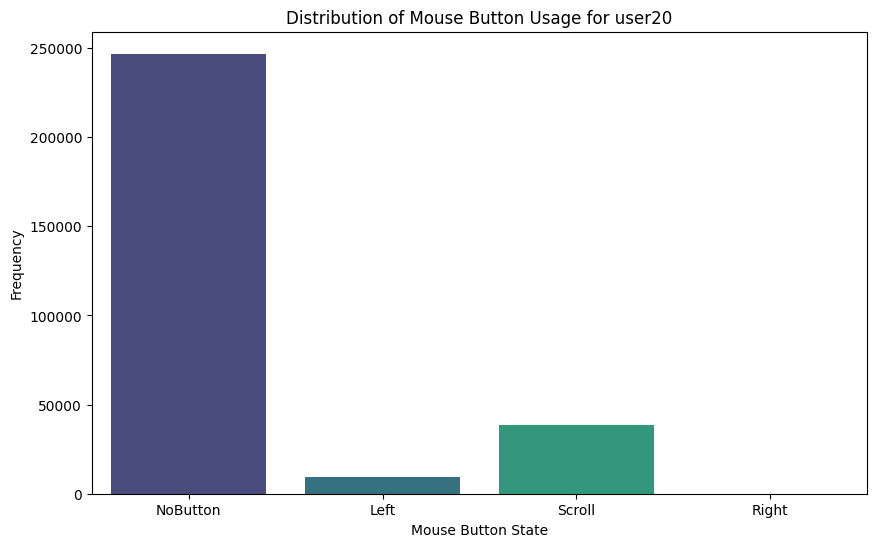

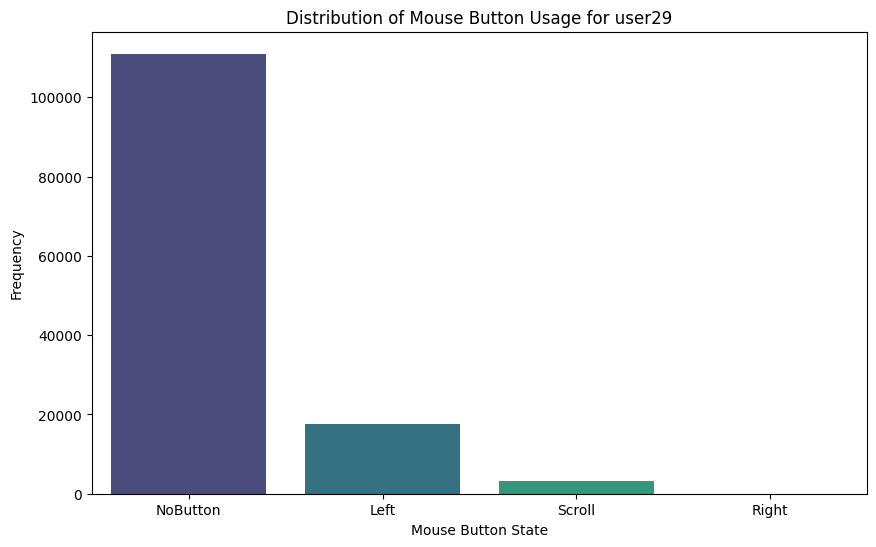

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for mouse button usage for each user
for user in all_users_data_df['user'].unique():
    user_data = all_users_data_df[all_users_data_df['user'] == user]

    plt.figure(figsize=(10, 6))
    sns.countplot(data=user_data, x='button', hue='button', palette="viridis", dodge=False)
    plt.xlabel('Mouse Button State')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Mouse Button Usage for {user}')
    plt.legend([],[], frameon=False)  # Remove legend to simplify the plot
    plt.show()


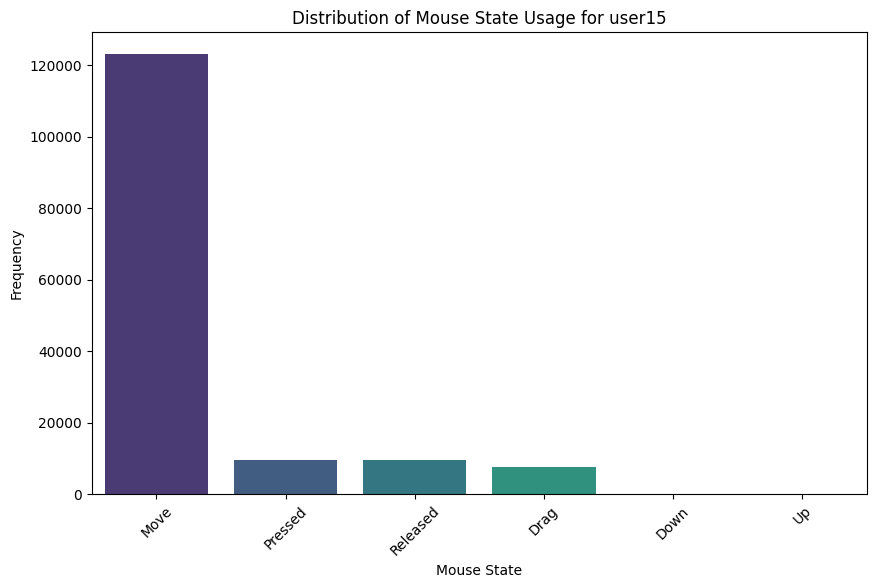

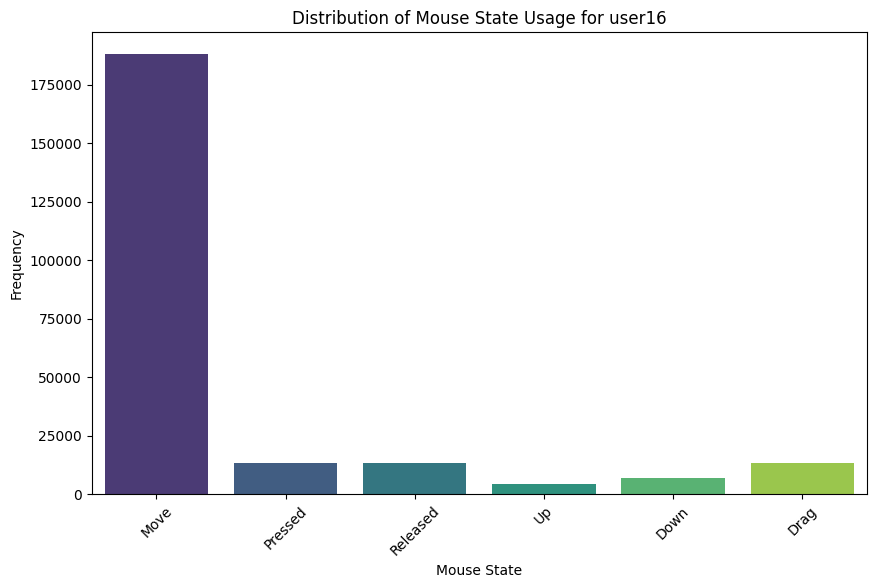

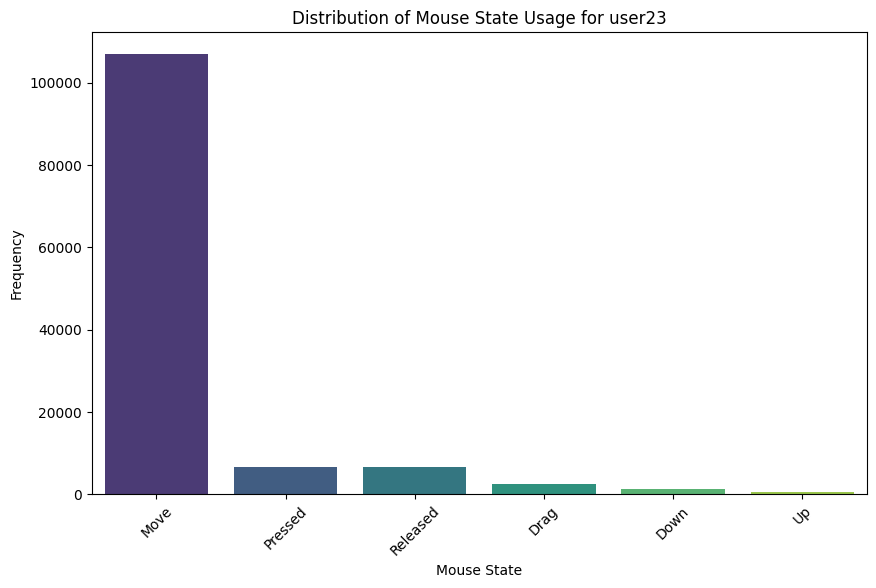

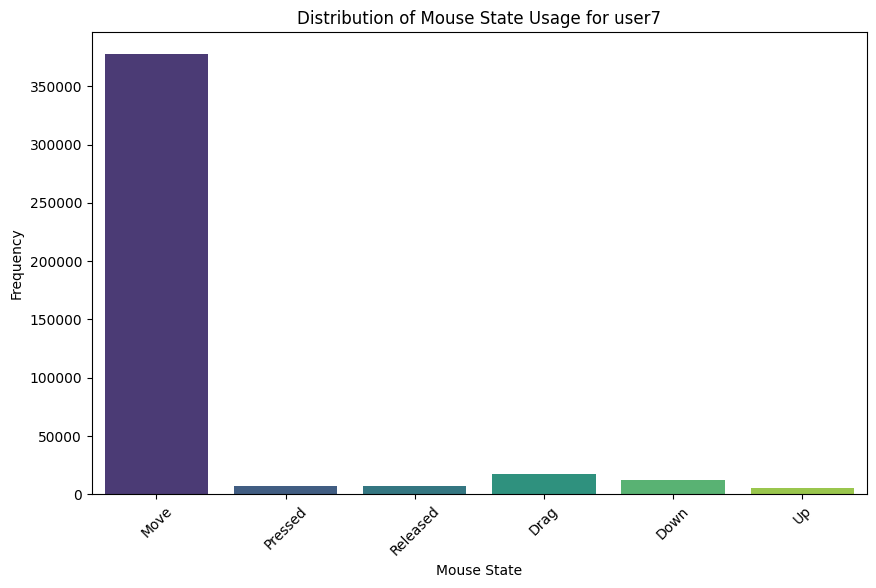

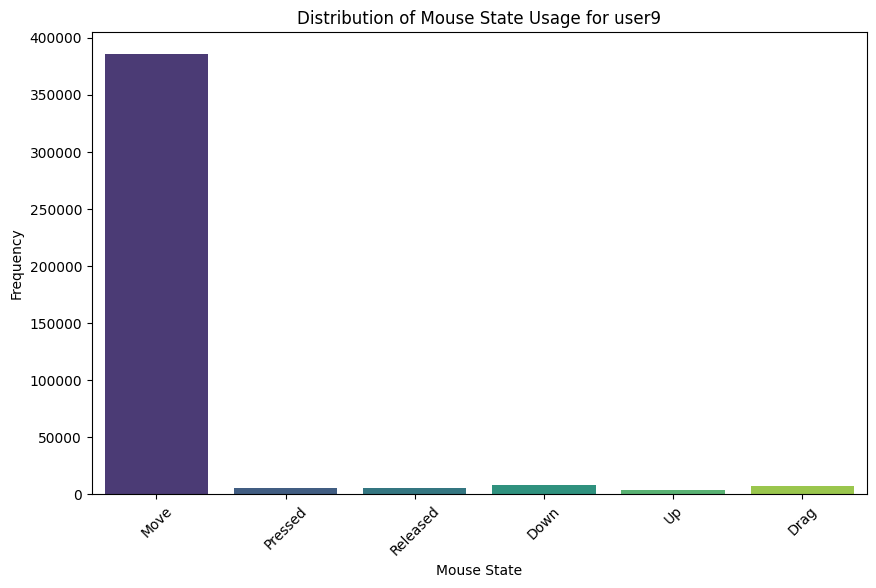

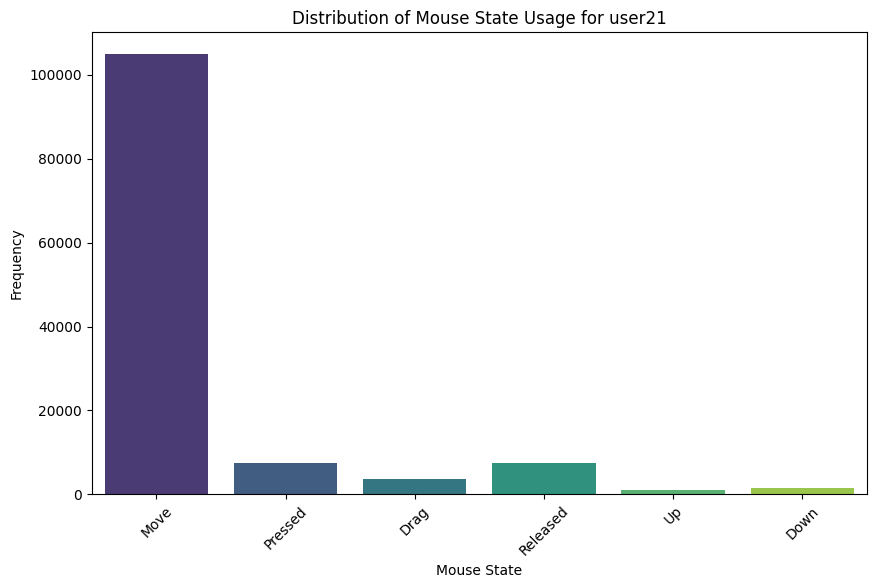

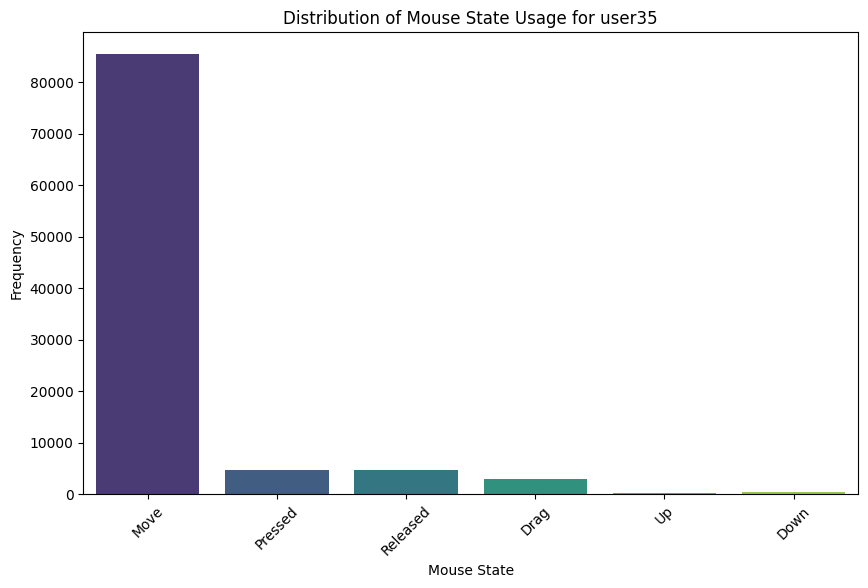

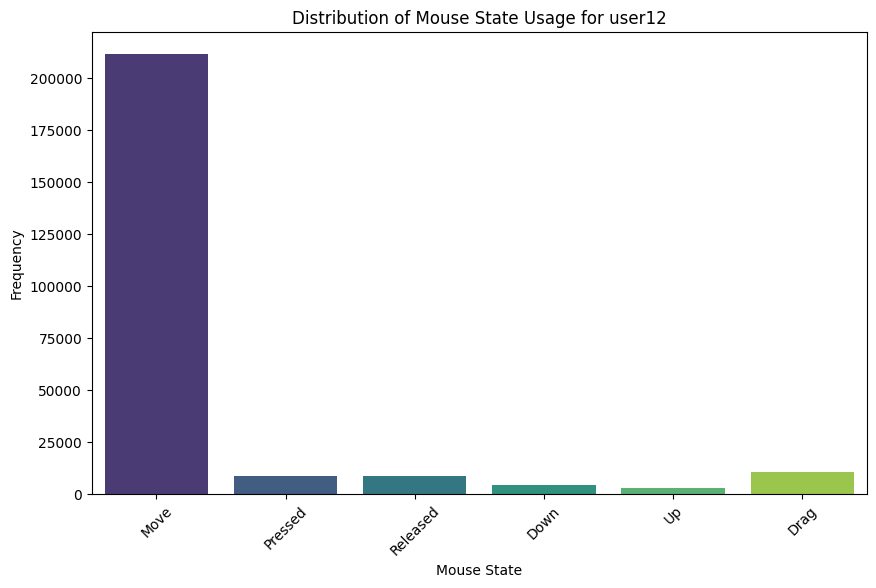

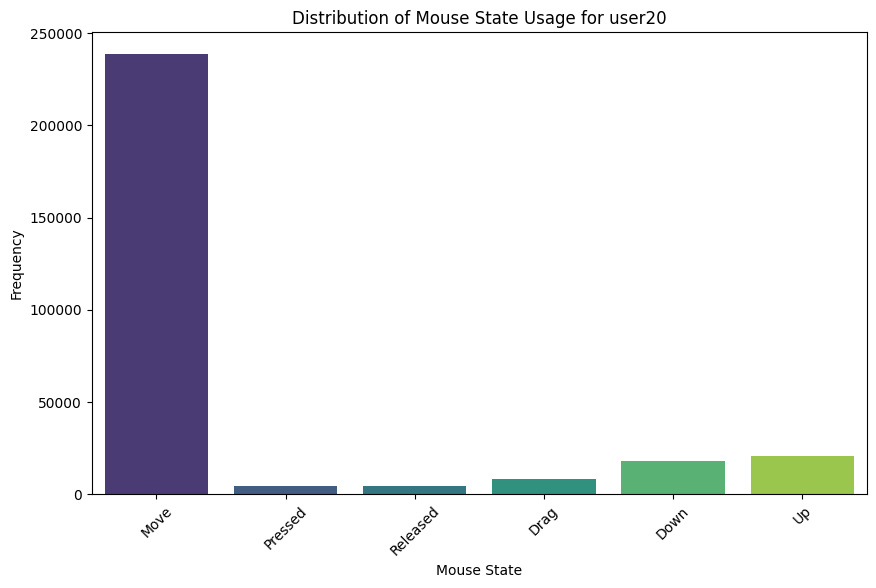

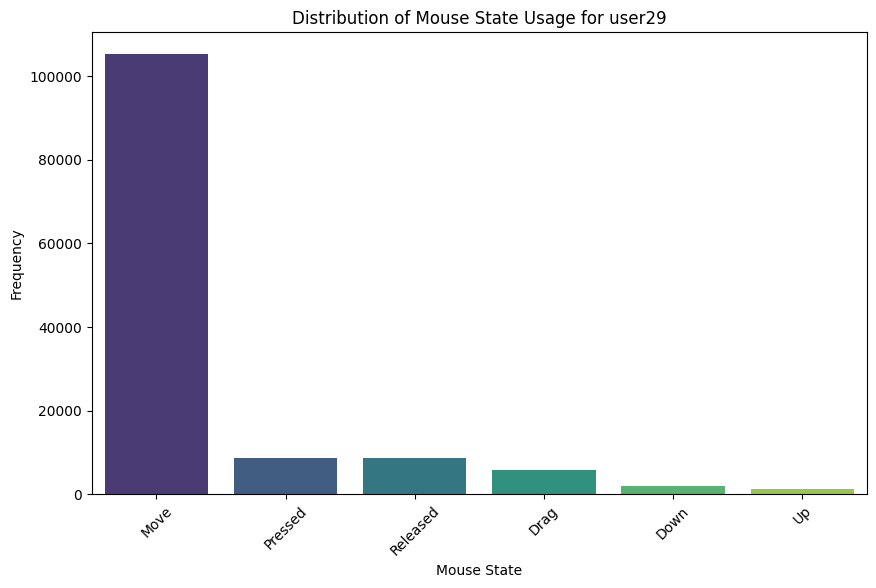

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for mouse state usage for each user
for user in all_users_data_df['user'].unique():
    user_data = all_users_data_df[all_users_data_df['user'] == user]

    plt.figure(figsize=(10, 6))
    sns.countplot(data=user_data, x='state', hue='state', palette="viridis", dodge=False)
    plt.xlabel('Mouse State')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of Mouse State Usage for {user}')
    plt.legend([],[], frameon=False)  # Remove legend for simplicity
    plt.show()


##Check for Null values

In [ ]:
null_counts = all_users_data_df.isnull().sum()

null_columns = null_counts[null_counts > 0]

print("Columns with null values and their counts:")
print(null_columns)

Columns with null values and their counts:
Series([], dtype: int64)


##Check for Zero Values

In [ ]:
zero_counts = (all_users_data_df == 0).sum()

zero_columns = zero_counts[zero_counts > 0]

print("Columns with zero values and their counts:")
print(zero_columns)


Columns with zero values and their counts:
record timestamp       85
client timestamp       70
x                   97626
y                   97805
dtype: int64


##Sliding window on numerical values


In [ ]:
from sklearn.preprocessing import StandardScaler

window_size = 100

columns_to_normalize = ['x', 'y', 'record timestamp', 'client timestamp']

def apply_sliding_window_and_normalize(group):
    for column in columns_to_normalize:
        group[column] = group[column].rolling(window=window_size, min_periods=1).mean()

    scaler = StandardScaler()
    group[columns_to_normalize] = scaler.fit_transform(group[columns_to_normalize])

    return group

all_users_data_df = all_users_data_df.groupby('user', group_keys=False).apply(apply_sliding_window_and_normalize).reset_index(drop=True)

all_users_data_df.head()


<ipython-input-5-140d10bd4d0a>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_users_data_df = all_users_data_df.groupby('user', group_keys=False).apply(apply_sliding_window_and_normalize).reset_index(drop=True)


,record timestamp,client timestamp,button,state,x,y,user
0,-1.734860,-1.734859,NoButton,Move,-0.253094,0.466738,user15
1,-1.734846,-1.734851,NoButton,Move,-0.218771,0.368043,user15
2,-1.734806,-1.734808,NoButton,Move,-0.201089,0.325469,user15
3,-1.734773,-1.734782,NoButton,Move,0.327273,-0.166073,user15
4,-1.734746,-1.734760,NoButton,Move,1.060532,-0.599172,user15


In [ ]:
null_counts = all_users_data_df.isnull().sum()

infinite_counts = np.isinf(all_users_data_df.select_dtypes(include=[np.number])).sum()

null_columns = null_counts[null_counts > 0]

infinite_columns = infinite_counts[infinite_counts > 0]

print("Columns with null values and their counts:")
print(null_columns)

print("\nColumns with infinite values and their counts:")
print(infinite_columns)

Columns with null values and their counts:
Series([], dtype: int64)

Columns with infinite values and their counts:
Series([], dtype: int64)


##Speed and Acceleration

In [ ]:
def calculate_speed_acceleration(group):
    group['distance'] = np.sqrt((group['x'].diff() ** 2) + (group['y'].diff() ** 2))

    group['time_diff'] = group['record timestamp'].diff()

    problematic_rows = group[
        (group['time_diff'] == 0) |  # Check for zero time difference
        (group['time_diff'].isnull()) |  # Check for NaN in time difference
        (group['distance'].isnull()) |  # Check for NaN in distance
        (group['time_diff'] < 0)  # Check for negative time differences (if any)
    ]
    if not problematic_rows.empty:
        print(f"Problematic rows detected for user {group['user'].iloc[0]}:")
        print(problematic_rows[['distance', 'time_diff']])

    group['speed'] = group['distance'] / group['time_diff']

    problematic_speed = group[
        group['speed'].isnull() |  # Check for NaN in speed
        np.isinf(group['speed'])  # Check for infinite values in speed
    ]
    if not problematic_speed.empty:
        print(f"Problematic speed values for user {group['user'].iloc[0]}:")
        print(problematic_speed[['distance', 'time_diff', 'speed']])

    group['acceleration'] = group['speed'].diff() / group['time_diff']

    return group

all_users_data_df = all_users_data_df.groupby('user', group_keys=False).apply(calculate_speed_acceleration)

all_users_data_df = all_users_data_df.drop(columns=['distance', 'time_diff'])


Problematic rows detected for user user12:
         distance  time_diff
1581044       NaN        NaN
1581045  0.000000   0.000000
1629288  0.028459  -0.032560
1629289  0.026575  -0.032559
1629290  0.026209  -0.032560
...           ...        ...
1794413  0.030215  -0.033493
1794414  0.030343  -0.033493
1794415  0.030385  -0.033493
1794416  0.026494  -0.033493
1794417  0.015799  -0.033494

[602 rows x 2 columns]
Problematic speed values for user user12:
         distance  time_diff  speed
1581044       NaN        NaN    NaN
1581045       0.0        0.0    NaN
Problematic rows detected for user user15:
        distance  time_diff
0            NaN        NaN
17156   0.012246  -0.019840
17157   0.011035  -0.019840
17158   0.009852  -0.019839
17159   0.010009  -0.019839
...          ...        ...
105998  0.027729  -0.029314
105999  0.023835  -0.029315
106000  0.023215  -0.029315
106001  0.022535  -0.029314
106002  0.022649  -0.029314

[501 rows x 2 columns]
Problematic speed values for use

<ipython-input-6-0d83b0269699>:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_users_data_df = all_users_data_df.groupby('user', group_keys=False).apply(calculate_speed_acceleration)


In [ ]:
null_values = all_users_data_df['speed'].isnull().sum()

infinite_values = np.isinf(all_users_data_df['speed']).sum()

print(f"Null values in 'speed': {null_values}")
print(f"Infinite values in 'speed': {infinite_values}")


Null values in 'speed': 11
Infinite values in 'speed': 1


##Movement Angles

In [ ]:
all_users_data_df['dx'] = all_users_data_df['x'].diff()
all_users_data_df['dy'] = all_users_data_df['y'].diff()

# np.arctan2 calculates the angle in radians between the x-axis and the point (dx, dy)
all_users_data_df['angle'] = np.arctan2(all_users_data_df['dy'], all_users_data_df['dx'])

all_users_data_df['delta_angle'] = all_users_data_df['angle'].diff()

all_users_data_df = all_users_data_df.drop(columns=['dx', 'dy'])

all_users_data_df


,record timestamp,client timestamp,button,state,x,y,user,speed,acceleration,angle,delta_angle
0,-1.734860,-1.734859,NoButton,Move,-0.253094,0.466738,user15,NaN,NaN,NaN,NaN
1,-1.734846,-1.734851,NoButton,Move,-0.218771,0.368043,user15,7742.812253,NaN,-1.236114,NaN
2,-1.734806,-1.734808,NoButton,Move,-0.201089,0.325469,user15,1143.243264,-1.636637e+08,-1.177165,0.058949
3,-1.734773,-1.734782,NoButton,Move,0.327273,-0.166073,user15,21623.824355,6.136879e+08,-0.749312,0.427854
4,-1.734746,-1.734760,NoButton,Move,1.060532,-0.599172,user15,31675.688419,3.738788e+08,-0.533515,0.215796
...,...,...,...,...,...,...,...,...,...,...,...
2253811,0.693743,0.693740,NoButton,Move,0.135419,-0.074549,user29,566.437139,3.323042e+06,0.598621,-0.198409
2253812,0.693781,0.693778,NoButton,Move,0.156877,-0.059319,user29,681.489660,2.979785e+06,0.617240,0.018618
2253813,0.693820,0.693817,NoButton,Move,0.175182,-0.052044,user29,512.090787,-4.403907e+06,0.378324,-0.238915
2253814,0.693858,0.693856,Left,Pressed,0.193298,-0.045261,user29,502.908521,-2.387138e+05,0.358221,-0.020103


##Click Patterns

In [ ]:
import pandas as pd

all_users_data_df['click_frequency'] = 0
all_users_data_df['click_duration'] = 0.0

for session_id, session_data in all_users_data_df.groupby('user'):

    # Identify click events where the button is pressed and released
    click_start_times = session_data[session_data['state'] == 'Pressed']['record timestamp'].values
    click_end_times = session_data[session_data['state'] == 'Released']['record timestamp'].values

    # Calculate click frequency: count the number of 'Pressed' events
    click_frequency = len(click_start_times)

    # Calculate click duration: iterate through start and end times, pair them safely
    click_duration = 0
    for start, end in zip(click_start_times, click_end_times):
        click_duration += end - start

    # Assign calculated values to the session rows
    all_users_data_df.loc[session_data.index, 'click_frequency'] = click_frequency
    all_users_data_df.loc[session_data.index, 'click_duration'] = click_duration


# Display the rows to verify
all_users_data_df

,record timestamp,client timestamp,button,state,x,y,user,speed,acceleration,angle,delta_angle,click_frequency,click_duration
0,-1.734860,-1.734859,NoButton,Move,-0.253094,0.466738,user15,NaN,NaN,NaN,NaN,9456,0.367710
1,-1.734846,-1.734851,NoButton,Move,-0.218771,0.368043,user15,7742.812253,NaN,-1.236114,NaN,9456,0.367710
2,-1.734806,-1.734808,NoButton,Move,-0.201089,0.325469,user15,1143.243264,-1.636637e+08,-1.177165,0.058949,9456,0.367710
3,-1.734773,-1.734782,NoButton,Move,0.327273,-0.166073,user15,21623.824355,6.136879e+08,-0.749312,0.427854,9456,0.367710
4,-1.734746,-1.734760,NoButton,Move,1.060532,-0.599172,user15,31675.688419,3.738788e+08,-0.533515,0.215796,9456,0.367710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,0.693743,0.693740,NoButton,Move,0.135419,-0.074549,user29,566.437139,3.323042e+06,0.598621,-0.198409,8752,0.224577
2253812,0.693781,0.693778,NoButton,Move,0.156877,-0.059319,user29,681.489660,2.979785e+06,0.617240,0.018618,8752,0.224577
2253813,0.693820,0.693817,NoButton,Move,0.175182,-0.052044,user29,512.090787,-4.403907e+06,0.378324,-0.238915,8752,0.224577
2253814,0.693858,0.693856,Left,Pressed,0.193298,-0.045261,user29,502.908521,-2.387138e+05,0.358221,-0.020103,8752,0.224577


##Idle Times

In [ ]:
import numpy as np
import pandas as pd

# Initialize the idle time column
all_users_data_df['idle_time'] = 0.0

# Calculate the differences between consecutive 'x' and 'y' coordinates
all_users_data_df['x_diff'] = all_users_data_df['x'].diff()
all_users_data_df['y_diff'] = all_users_data_df['y'].diff()

# Calculate idle times where both x_diff and y_diff are 0 (mouse position hasn't changed)
# Idle time is the difference in 'record timestamp' where x_diff and y_diff are both 0
idle_conditions = (all_users_data_df['x_diff'] == 0) & (all_users_data_df['y_diff'] == 0)
all_users_data_df['idle_time'] = np.where(idle_conditions, all_users_data_df['record timestamp'].diff(), 0)

# Drop intermediate columns if they are no longer needed
all_users_data_df = all_users_data_df.drop(columns=['x_diff', 'y_diff'])

# Display the rows to verify
all_users_data_df


,record timestamp,client timestamp,button,state,x,y,user,speed,acceleration,angle,delta_angle,click_frequency,click_duration,idle_time
0,-1.734860,-1.734859,NoButton,Move,-0.253094,0.466738,user15,NaN,NaN,NaN,NaN,9456,0.367710,0.0
1,-1.734846,-1.734851,NoButton,Move,-0.218771,0.368043,user15,7742.812253,NaN,-1.236114,NaN,9456,0.367710,0.0
2,-1.734806,-1.734808,NoButton,Move,-0.201089,0.325469,user15,1143.243264,-1.636637e+08,-1.177165,0.058949,9456,0.367710,0.0
3,-1.734773,-1.734782,NoButton,Move,0.327273,-0.166073,user15,21623.824355,6.136879e+08,-0.749312,0.427854,9456,0.367710,0.0
4,-1.734746,-1.734760,NoButton,Move,1.060532,-0.599172,user15,31675.688419,3.738788e+08,-0.533515,0.215796,9456,0.367710,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,0.693743,0.693740,NoButton,Move,0.135419,-0.074549,user29,566.437139,3.323042e+06,0.598621,-0.198409,8752,0.224577,0.0
2253812,0.693781,0.693778,NoButton,Move,0.156877,-0.059319,user29,681.489660,2.979785e+06,0.617240,0.018618,8752,0.224577,0.0
2253813,0.693820,0.693817,NoButton,Move,0.175182,-0.052044,user29,512.090787,-4.403907e+06,0.378324,-0.238915,8752,0.224577,0.0
2253814,0.693858,0.693856,Left,Pressed,0.193298,-0.045261,user29,502.908521,-2.387138e+05,0.358221,-0.020103,8752,0.224577,0.0


##Check for Null and Infinite Values

In [ ]:
import numpy as np

null_counts = all_users_data_df.isnull().sum()

infinite_counts = np.isinf(all_users_data_df.select_dtypes(include=[np.number])).sum()

null_columns = null_counts[null_counts > 0]

infinite_columns = infinite_counts[infinite_counts > 0]

print("Columns with null values and their counts:")
print(null_columns)

print("\nColumns with infinite values and their counts:")
print(infinite_columns)


Columns with null values and their counts:
speed           11
acceleration    21
angle            1
delta_angle      2
dtype: int64

Columns with infinite values and their counts:
speed           1
acceleration    1
dtype: int64


##Handle Null and Infinite Values

In [ ]:
import numpy as np

all_users_data_df = all_users_data_df.dropna().copy()

# Replace inf with NaN in all numeric columns
all_users_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# nterpolation only on numeric columns
numeric_columns = all_users_data_df.select_dtypes(include=[np.number]).columns
all_users_data_df[numeric_columns] = all_users_data_df[numeric_columns].interpolate(method='linear', inplace=False)

null_counts = all_users_data_df.isnull().sum()
infinite_counts = np.isinf(all_users_data_df.select_dtypes(include=[np.number])).sum()

print("Columns with remaining null values after handling:")
print(null_counts[null_counts > 0])

print("\nColumns with remaining infinite values after handling:")
print(infinite_counts[infinite_counts > 0])


Columns with remaining null values after handling:
Series([], dtype: int64)

Columns with remaining infinite values after handling:
Series([], dtype: int64)


In [ ]:
all_users_data_df

,record timestamp,client timestamp,button,state,x,y,user,speed,acceleration,angle,delta_angle,click_frequency,click_duration,idle_time
2,-1.734806,-1.734808,NoButton,Move,-0.201089,0.325469,user15,1143.243264,-1.636637e+08,-1.177165,0.058949,9456,0.367710,0.0
3,-1.734773,-1.734782,NoButton,Move,0.327273,-0.166073,user15,21623.824355,6.136879e+08,-0.749312,0.427854,9456,0.367710,0.0
4,-1.734746,-1.734760,NoButton,Move,1.060532,-0.599172,user15,31675.688419,3.738788e+08,-0.533515,0.215796,9456,0.367710,0.0
5,-1.734728,-1.734742,NoButton,Move,1.549371,-0.903386,user15,32123.574424,2.498866e+07,-0.556669,-0.023154,9456,0.367710,0.0
6,-1.734715,-1.734727,NoButton,Move,1.893639,-1.150539,user15,33102.643138,7.647451e+07,-0.622645,-0.065976,9456,0.367710,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,0.693743,0.693740,NoButton,Move,0.135419,-0.074549,user29,566.437139,3.323042e+06,0.598621,-0.198409,8752,0.224577,0.0
2253812,0.693781,0.693778,NoButton,Move,0.156877,-0.059319,user29,681.489660,2.979785e+06,0.617240,0.018618,8752,0.224577,0.0
2253813,0.693820,0.693817,NoButton,Move,0.175182,-0.052044,user29,512.090787,-4.403907e+06,0.378324,-0.238915,8752,0.224577,0.0
2253814,0.693858,0.693856,Left,Pressed,0.193298,-0.045261,user29,502.908521,-2.387138e+05,0.358221,-0.020103,8752,0.224577,0.0


In [ ]:
print(all_users_data_df.columns)

Index(['record timestamp', 'client timestamp', 'button', 'state', 'x', 'y',
       'user', 'speed', 'acceleration', 'angle', 'delta_angle',
       'click_frequency', 'click_duration', 'idle_time'],
      dtype='object')


#**Train the Model**

##One-Hot Encoding for Categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encode 'button' and 'state'
encoder_button = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_state = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'button' and 'state' columns
button_encoded = encoder_button.fit_transform(all_users_data_df[['button']])
state_encoded = encoder_state.fit_transform(all_users_data_df[['state']])

# Retrieve feature names automatically to avoid mismatch errors
button_feature_names = encoder_button.get_feature_names_out(['button'])
state_feature_names = encoder_state.get_feature_names_out(['state'])

# Convert encoded arrays to DataFrames for readability
button_features = pd.DataFrame(button_encoded, columns=button_feature_names)
state_features = pd.DataFrame(state_encoded, columns=state_feature_names)

# Concatenate the encoded features back to the original DataFrame
all_users_data_df = pd.concat([all_users_data_df.reset_index(drop=True), button_features, state_features], axis=1)

# Drop the original 'button' and 'state' columns (optional)
all_users_data_df.drop(columns=['button', 'state'], inplace=True)

# Display the updated DataFrame
all_users_data_df.head()


,record timestamp,client timestamp,x,y,user,speed,acceleration,angle,delta_angle,click_frequency,...,button_NoButton,button_Right,button_Scroll,button_XButton,state_Down,state_Drag,state_Move,state_Pressed,state_Released,state_Up
0,-1.734806,-1.734808,-0.201089,0.325469,user15,1143.243264,-1.636637e+08,-1.177165,0.058949,9456,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.734773,-1.734782,0.327273,-0.166073,user15,21623.824355,6.136879e+08,-0.749312,0.427854,9456,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.734746,-1.734760,1.060532,-0.599172,user15,31675.688419,3.738788e+08,-0.533515,0.215796,9456,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.734728,-1.734742,1.549371,-0.903386,user15,32123.574424,2.498866e+07,-0.556669,-0.023154,9456,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.734715,-1.734727,1.893639,-1.150539,user15,33102.643138,7.647451e+07,-0.622645,-0.065976,9456,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##Select Features and Label

In [ ]:
# Select numerical features and one-hot encoded button/state features
X_numerical = all_users_data_df[['x', 'y', 'speed', 'acceleration', 'angle', 'delta_angle', 'click_frequency', 'idle_time']].values
X_button = button_features.values  # One-hot encoded button features
X_state = state_features.values    # One-hot encoded state features
y = all_users_data_df['user']


##Encode the Label

In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Encode user labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels for multi-class classification
y_onehot = tf.keras.utils.to_categorical(y_encoded)


##Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_num, X_test_num, X_train_btn, X_test_btn, X_train_state, X_test_state, y_train, y_test = train_test_split(
    X_numerical, X_button, X_state, y_onehot, test_size=0.2, random_state=42
)

##Reshape Features for the Model

In [ ]:
import tensorflow as tf

# Reshape numerical features for compatibility with CNN + LSTM
X_train_num = X_train_num.reshape(X_train_num.shape[0], 1, X_train_num.shape[1])
X_test_num = X_test_num.reshape(X_test_num.shape[0], 1, X_test_num.shape[1])


##Define the CNN + LSTM + ANN Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Concatenate

# Input Layer for Numerical Features
numerical_input = Input(shape=(X_train_num.shape[1], X_train_num.shape[2]), name='Numerical_Input')

# CNN Component
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(numerical_input)
cnn = BatchNormalization()(cnn)
# cnn = MaxPooling1D(pool_size=2)(cnn)

# LSTM Component
lstm = LSTM(units=128, return_sequences=True)(cnn)
lstm = Dropout(0.3)(lstm)
lstm = LSTM(units=64)(lstm)

# Input Layers for One-Hot Encoded Features
button_input = Input(shape=(X_train_btn.shape[1],), name='Button_Input')
state_input = Input(shape=(X_train_state.shape[1],), name='State_Input')

# Combine Numerical and One-Hot Encoded Features
combined = Concatenate()([lstm, button_input, state_input])

# ANN Component
dense = Dense(128, activation='relu')(combined)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)

# Output Layer (Softmax for multi-class classification)
output_layer = Dense(y_onehot.shape[1], activation='softmax', name='Output')(dense)

# Define the Model
model = Model(inputs=[numerical_input, button_input, state_input], outputs=output_layer)


##Compile and Train the Model

In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    [X_train_num, X_train_btn, X_train_state],
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 387s 8ms/step - accuracy: 0.4979 - loss: 1.3105 - val_accuracy: 0.7759 - val_loss: 0.6276
Epoch 2/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 379s 8ms/step - accuracy: 0.6252 - loss: 0.9402 - val_accuracy: 0.7892 - val_loss: 0.6094
Epoch 3/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 382s 8ms/step - accuracy: 0.6509 - loss: 0.8633 - val_accuracy: 0.7264 - val_loss: 0.6518
Epoch 4/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 361s 8ms/step - accuracy: 0.6592 - loss: 0.8396 - val_accuracy: 0.7163 - val_loss: 0.8668
Epoch 5/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 400s 8ms/step - accuracy: 0.6667 - loss: 0.8181 - val_accuracy: 0.7874 - val_loss: 0.5668
Epoch 6/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 375s 8ms/step - accuracy: 0.6686 - loss: 0.8105 - val_accuracy: 0.6056 - val_loss: 0.9482
Epoch 7/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 370s 8ms/step - accuracy: 0.6713 - loss: 0.8019 - val_accuracy: 0.7389 - val_loss: 0.7405
Epoch 8/20
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 394s 8ms/step - ac

##Bidirectional LSTM

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Concatenate, Bidirectional

# Input Layer for Numerical Features
numerical_input = Input(shape=(X_train_num.shape[1], X_train_num.shape[2]), name='Numerical_Input')

# CNN Component
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(numerical_input)
cnn = BatchNormalization()(cnn)
# cnn = MaxPooling1D(pool_size=2)(cnn)

# Replace LSTM with Bidirectional LSTM
lstm = Bidirectional(LSTM(units=128, return_sequences=True))(cnn)
lstm = Dropout(0.3)(lstm)
lstm = Bidirectional(LSTM(units=64))(lstm)

# Input Layers for One-Hot Encoded Features
button_input = Input(shape=(X_train_btn.shape[1],), name='Button_Input')
state_input = Input(shape=(X_train_state.shape[1],), name='State_Input')

# Combine Numerical and One-Hot Encoded Features
combined = Concatenate()([lstm, button_input, state_input])

# ANN Component
dense = Dense(128, activation='relu')(combined)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)

# Output Layer (Softmax for multi-class classification)
output_layer = Dense(y_onehot.shape[1], activation='softmax', name='Output')(dense)

# Define the Model
model = Model(inputs=[numerical_input, button_input, state_input], outputs=output_layer)


In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    [X_train_num, X_train_btn, X_train_state],
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 672s 15ms/step - accuracy: 0.5325 - loss: 1.2033 - val_accuracy: 0.5997 - val_loss: 0.9189
Epoch 2/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 651s 14ms/step - accuracy: 0.6309 - loss: 0.9202 - val_accuracy: 0.2797 - val_loss: 2.3505
Epoch 3/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 731s 16ms/step - accuracy: 0.6524 - loss: 0.8601 - val_accuracy: 0.1936 - val_loss: 3.1907
Epoch 4/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 696s 15ms/step - accuracy: 0.6675 - loss: 0.8176 - val_accuracy: 0.8279 - val_loss: 0.5589
Epoch 5/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 679s 14ms/step - accuracy: 0.6689 - loss: 0.8129 - val_accuracy: 0.8330 - val_loss: 0.5741
Epoch 6/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 659s 15ms/step - accuracy: 0.6695 - loss: 0.8111 - val_accuracy: 0.8235 - val_loss: 0.5904
Epoch 7/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 680s 15ms/step - accuracy: 0.6738 - loss: 0.8030 - val_accuracy: 0.7860 - val_loss: 0.6392
Epoch 8/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 665s 15ms/s

##Compute Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.9131293528508514, 1: 1.5033418045744702, 2: 0.9389091166619453, 3: 0.7660888186406974, 4: 1.7897346917707597, 5: 1.809608498064972, 6: 1.710673325793744, 7: 2.2796000728243717, 8: 0.5289878373367006, 9: 0.542212978689621}


##Reduce Learning Rate

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define optimizer with a lower initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Re-compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce learning rate by a factor of 0.5
    patience=3,          # Number of epochs with no improvement
    verbose=1            # Log updates
)


##Fit the Model with Class Weights and Learning Rate Scheduler

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping for efficient training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    [X_train_num, X_train_btn, X_train_state],  # Numerical and one-hot encoded features
    y_train,                                   # One-hot encoded labels
    epochs=10,                                 # Number of epochs
    batch_size=32,                             # Batch size
    validation_split=0.2,                      # Validation split
    class_weight=class_weight_dict,            # Class weights
    callbacks=[lr_scheduler, early_stopping]   # Callbacks
)


Epoch 1/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 321s 7ms/step - accuracy: 0.5947 - loss: 0.8852 - val_accuracy: 0.7905 - val_loss: 0.6348 - learning_rate: 1.0000e-04
Epoch 2/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 323s 7ms/step - accuracy: 0.5977 - loss: 0.8712 - val_accuracy: 0.7940 - val_loss: 0.6238 - learning_rate: 1.0000e-04
Epoch 3/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 300s 7ms/step - accuracy: 0.5962 - loss: 0.8695 - val_accuracy: 0.7963 - val_loss: 0.6167 - learning_rate: 1.0000e-04
Epoch 4/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 340s 7ms/step - accuracy: 0.5992 - loss: 0.8652 - val_accuracy: 0.7770 - val_loss: 0.6824 - learning_rate: 1.0000e-04
Epoch 5/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 324s 7ms/step - accuracy: 0.5991 - loss: 0.8629 - val_accuracy: 0.7744 - val_loss: 0.6384 - learning_rate: 1.0000e-04
Epoch 6/10
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 320s 7ms/step - accuracy: 0.6039 - loss: 0.8590 - val_accuracy: 0.7345 - val_loss: 0.6145 - learning_rate: 1.0000e-04
Epoch 7/10
45076/45076 ━━━━━

##Increase Learning Rate to 0.001

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a higher learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


##Add More Layers in CNN or LSTM and Use Bidirectional LSTM

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Concatenate

# Input Layer for Numerical Features
numerical_input = Input(shape=(X_train_num.shape[1], X_train_num.shape[2]), name='Numerical_Input')

# CNN Component (with additional layers)
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(numerical_input)
cnn = BatchNormalization()(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = BatchNormalization()(cnn)

# LSTM Component (with Bidirectional LSTM and additional LSTM layers)
lstm = Bidirectional(LSTM(units=128, return_sequences=True))(cnn)
lstm = Dropout(0.3)(lstm)
lstm = Bidirectional(LSTM(units=64, return_sequences=False))(lstm)

# Input Layers for One-Hot Encoded Features
button_input = Input(shape=(X_train_btn.shape[1],), name='Button_Input')
state_input = Input(shape=(X_train_state.shape[1],), name='State_Input')

# Combine Numerical and One-Hot Encoded Features
combined = Concatenate()([lstm, button_input, state_input])

# ANN Component (with additional layers)
dense = Dense(256, activation='relu')(combined)
dense = Dropout(0.4)(dense)
dense = Dense(128, activation='relu')(dense)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)

# Output Layer (Softmax for multi-class classification)
output_layer = Dense(y_onehot.shape[1], activation='softmax', name='Output')(dense)

# Define the Model
model = Model(inputs=[numerical_input, button_input, state_input], outputs=output_layer)

# Compile the Model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


##Add Early Stopping and Increase Epochs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    [X_train_num, X_train_btn, X_train_state],
    y_train,
    epochs=50,                 # Increase epochs to 50 for more training opportunities
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping] # Add Early Stopping
)


Epoch 1/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 751s 16ms/step - accuracy: 0.5606 - loss: 1.1479 - val_accuracy: 0.6021 - val_loss: 1.9180
Epoch 2/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 749s 17ms/step - accuracy: 0.7518 - loss: 0.6346 - val_accuracy: 0.7113 - val_loss: 0.7223
Epoch 3/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 800s 17ms/step - accuracy: 0.7879 - loss: 0.5360 - val_accuracy: 0.5702 - val_loss: 1.8112
Epoch 4/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 746s 17ms/step - accuracy: 0.7991 - loss: 0.5055 - val_accuracy: 0.5997 - val_loss: 1.7603
Epoch 5/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 791s 16ms/step - accuracy: 0.8139 - loss: 0.4639 - val_accuracy: 0.2971 - val_loss: 2.1394
Epoch 6/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 744s 16ms/step - accuracy: 0.8125 - loss: 0.4685 - val_accuracy: 0.2420 - val_loss: 5.3413
Epoch 7/50
45076/45076 ━━━━━━━━━━━━━━━━━━━━ 740s 16ms/step - accuracy: 0.8283 - loss: 0.4231 - val_accuracy: 0.6465 - val_loss: 1.0091


##Evaluate the Model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate([X_test_num, X_test_btn, X_test_state], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


14087/14087 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.7115 - loss: 0.7208
Test Loss: 0.7196916341781616
Test Accuracy: 0.7123740315437317


##Analyze Class-Wise Performance

In [ ]:
from sklearn.metrics import classification_report

y_test_pred = model.predict([X_test_num, X_test_btn, X_test_state]).argmax(axis=1)
y_test_actual = y_test.argmax(axis=1)
print(classification_report(y_test_actual, y_test_pred))


14087/14087 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.18      0.00      0.00     49793
           1       0.07      0.06      0.07     29906
           2       0.19      0.05      0.08     48009
           3       0.00      0.00      0.00     58747
           4       0.00      0.00      0.00     25178
           5       0.00      0.00      0.00     24827
           6       0.15      0.00      0.01     26152
           7       0.02      0.00      0.00     19672
           8       0.00      0.00      0.00     85372
           9       0.19      0.95      0.32     83103

    accuracy                           0.18    450759
   macro avg       0.08      0.11      0.05    450759
weighted avg       0.09      0.18      0.07    450759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Analyze Class Distribution

In [ ]:
import pandas as pd

# Check class distribution
class_distribution = pd.Series(y_test.argmax(axis=1)).value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 8    85372
9    83103
3    58747
0    49793
2    48009
1    29906
6    26152
4    25178
5    24827
7    19672
Name: count, dtype: int64


##Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.argmax(axis=1)),  # Flatten one-hot labels to class indices
    y=y_train.argmax(axis=1)
)

# Convert to dictionary format
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.9151166331688897, 1: 1.5023672435486155, 2: 0.9389100945140209, 3: 0.7657894736842106, 4: 1.7895961330408632, 5: 1.8081168082311294, 6: 1.7074689621864259, 7: 2.276675589676246, 8: 0.5292368926225322, 9: 0.5421637404040738}


## Apply Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Convert one-hot encoded labels back to integers for SMOTE
y_train_flat = y_train.argmax(axis=1)

# Reshape features for SMOTE
X_train_flat = X_train_num.reshape(X_train_num.shape[0], -1)  # Flatten the 3D array to 2D

# Apply SMOTE: generates synthetic examples for the minority class to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train_flat)

# Reshape features back to original shape
X_train_resampled = X_train_resampled.reshape(-1, X_train_num.shape[1], X_train_num.shape[2])

# One-hot encode the labels again
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled)

print("Resampled Class Distribution:")
print(pd.Series(y_train_resampled.argmax(axis=1)).value_counts())


Resampled Class Distribution:
9    340686
0    340686
6    340686
7    340686
8    340686
3    340686
2    340686
1    340686
4    340686
5    340686
Name: count, dtype: int64


##Combine Features for Resampling


In [ ]:
# Concatenate numerical, button, and state features
X_train_combined = np.concatenate(
    [X_train_num.reshape(X_train_num.shape[0], -1), X_train_btn, X_train_state],
    axis=1
)


##Apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the combined features to generate synthetic samples
smote = SMOTE(random_state=42)
X_train_resampled_combined, y_train_resampled = smote.fit_resample(
    X_train_combined, y_train.argmax(axis=1)
)


##Split Resampled Features

In [ ]:
# Calculate split indices
num_features = X_train_num.shape[1] * X_train_num.shape[2]  # Total numerical features
btn_features = X_train_btn.shape[1]  # Button features

# Reshape numerical features back to original shape
X_train_resampled_num = X_train_resampled_combined[:, :num_features].reshape(-1, X_train_num.shape[1], X_train_num.shape[2])

# Extract button and state features
X_train_resampled_btn = X_train_resampled_combined[:, num_features:num_features + btn_features]
X_train_resampled_state = X_train_resampled_combined[:, num_features + btn_features:]


##One-Hot Encode Resampled Labels

In [ ]:
# One-hot encode the resampled labels
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled)


In [ ]:
# Verify shapes
print("X_train_resampled_num shape:", X_train_resampled_num.shape)
print("X_train_resampled_btn shape:", X_train_resampled_btn.shape)
print("X_train_resampled_state shape:", X_train_resampled_state.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

X_train_resampled_num shape: (3406860, 1, 8)
X_train_resampled_btn shape: (3406860, 5)
X_train_resampled_state shape: (3406860, 6)
y_train_resampled shape: (3406860, 10)


##Train the Model

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a higher learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Concatenate

# Input Layer for Numerical Features
numerical_input = Input(shape=(X_train_resampled_num.shape[1], X_train_resampled_num.shape[2]), name='Numerical_Input')

# CNN Component (with additional layers)
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(numerical_input)
cnn = BatchNormalization()(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = BatchNormalization()(cnn)

# LSTM Component (with Bidirectional LSTM and additional LSTM layers)
lstm = Bidirectional(LSTM(units=128, return_sequences=True))(cnn)
lstm = Dropout(0.3)(lstm)
lstm = Bidirectional(LSTM(units=64, return_sequences=False))(lstm)

# Input Layers for One-Hot Encoded Features
button_input = Input(shape=(X_train_resampled_btn.shape[1],), name='Button_Input')
state_input = Input(shape=(X_train_resampled_state.shape[1],), name='State_Input')

# Combine Numerical and One-Hot Encoded Features
combined = Concatenate()([lstm, button_input, state_input])

# ANN Component (with additional layers)
dense = Dense(256, activation='relu')(combined)
dense = Dropout(0.4)(dense)
dense = Dense(128, activation='relu')(dense)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)

# Output Layer (Softmax for multi-class classification)
output_layer = Dense(y_train_resampled.shape[1], activation='softmax', name='Output')(dense)

# Define the Model
model = Model(inputs=[numerical_input, button_input, state_input], outputs=output_layer)

# Compile the Model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    [X_train_resampled_num, X_train_resampled_btn, X_train_resampled_state],  # Inputs
    y_train_resampled,  # Labels
    epochs=50,          # Max epochs
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    class_weight=class_weight_dict,  # Handle class imbalance
    callbacks=[early_stopping]  # Early stopping
)


Epoch 1/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1795s 20ms/step - accuracy: 0.5691 - loss: 1.1030 - val_accuracy: 0.2555 - val_loss: 1.9921
Epoch 2/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1722s 20ms/step - accuracy: 0.7719 - loss: 0.5007 - val_accuracy: 0.0156 - val_loss: 6.2245
Epoch 3/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1694s 20ms/step - accuracy: 0.7926 - loss: 0.4453 - val_accuracy: 0.0214 - val_loss: 4.5045
Epoch 4/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1685s 20ms/step - accuracy: 0.7955 - loss: 0.4434 - val_accuracy: 0.0133 - val_loss: 4.2410
Epoch 5/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1704s 20ms/step - accuracy: 0.8075 - loss: 0.4114 - val_accuracy: 0.0581 - val_loss: 4.8582
Epoch 6/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1718s 20ms/step - accuracy: 0.8075 - loss: 0.4182 - val_accuracy: 0.1811 - val_loss: 2.1434


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate([X_test_num, X_test_btn, X_test_state], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

14087/14087 ━━━━━━━━━━━━━━━━━━━━ 85s 6ms/step - accuracy: 0.3481 - loss: 1.4324
Test Loss: 1.4288731813430786
Test Accuracy: 0.3490401804447174


##Random Oversampling

In [ ]:

from imblearn.over_sampling import RandomOverSampler

# Combine features for oversampling
X_train_combined = np.concatenate(
    [X_train_num.reshape(X_train_num.shape[0], -1), X_train_btn, X_train_state],
    axis=1
)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled_combined, y_train_resampled = ros.fit_resample(X_train_combined, y_train.argmax(axis=1))

# Split resampled features
num_features = X_train_num.shape[1] * X_train_num.shape[2]
btn_features = X_train_btn.shape[1]

X_train_resampled_num = X_train_resampled_combined[:, :num_features].reshape(-1, X_train_num.shape[1], X_train_num.shape[2])
X_train_resampled_btn = X_train_resampled_combined[:, num_features:num_features + btn_features]
X_train_resampled_state = X_train_resampled_combined[:, num_features + btn_features:]

# One-hot encode resampled labels
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled)

print("Resampled Class Distribution:")
print(pd.Series(y_train_resampled.argmax(axis=1)).value_counts())


Resampled Class Distribution:
9    340686
0    340686
6    340686
7    340686
8    340686
3    340686
2    340686
1    340686
4    340686
5    340686
Name: count, dtype: int64


In [ ]:
print("Numerical Features Shape:", X_train_resampled_num.shape)
print("Button Features Shape:", X_train_resampled_btn.shape)
print("State Features Shape:", X_train_resampled_state.shape)
print("Labels Shape:", y_train_resampled.shape)


Numerical Features Shape: (3406860, 1, 8)
Button Features Shape: (3406860, 5)
State Features Shape: (3406860, 6)
Labels Shape: (3406860, 10)


In [ ]:

!pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
import numpy as np
import tensorflow as tf
# Import the Adam optimizer
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model with the resampled data
history = model.fit(
    [X_train_resampled_num, X_train_resampled_btn, X_train_resampled_state],
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate([X_test_num, X_test_btn, X_test_state], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Resampled Class Distribution:
9    340686
0    340686
6    340686
7    340686
8    340686
3    340686
2    340686
1    340686
4    340686
5    340686
Name: count, dtype: int64
Numerical Features Shape: (3406860, 1, 8)
Button Features Shape: (3406860, 5)
State Features Shape: (3406860, 6)
Labels Shape: (3406860, 10)
Epoch 1/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 837s 10ms/step - accuracy: 0.6048 - loss: 0.9938 - val_accuracy: 0.0387 - val_loss: 1.5597
Epoch 2/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 786s 9ms/step - accuracy: 0.6586 - loss: 0.8448 - val_accuracy: 0.0391 - val_loss: 1.6170
Epoch 3/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 822s 9ms/step - accuracy: 0.6691 - loss: 0.8151 - val_accuracy: 0.0110 - val_loss: 1.8842
Epoch 4/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 946s 10ms/step - accuracy: 0.6767 - loss: 0.7914 - val_accuracy: 0.0355 - val_loss: 1.6674
Epoch 5/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 845s 10ms/step - accuracy: 0.6794 - loss: 0.7875 - val_accuracy: 0.0351 - val_loss: 1.6180
Epoch 6/50

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Input Layer for Numerical Features
numerical_input = Input(shape=(X_train_resampled_num.shape[1], X_train_resampled_num.shape[2]), name='Numerical_Input')

# CNN Component (with additional layers)
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(numerical_input)
cnn = BatchNormalization()(cnn)
cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = BatchNormalization()(cnn)

# LSTM Component
lstm = LSTM(units=128, return_sequences=True)(cnn)
lstm = Dropout(0.3)(lstm)
lstm = LSTM(units=64, return_sequences=False)(lstm)

# Input Layers for One-Hot Encoded Features
button_input = Input(shape=(X_train_resampled_btn.shape[1],), name='Button_Input')
state_input = Input(shape=(X_train_resampled_state.shape[1],), name='State_Input')

# Combine Numerical and One-Hot Encoded Features
combined = Concatenate()([lstm, button_input, state_input])

# ANN Component (with additional layers)
dense = Dense(256, activation='relu')(combined)
dense = Dropout(0.4)(dense)
dense = Dense(128, activation='relu')(dense)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)

# Output Layer (Softmax for multi-class classification)
output_layer = Dense(y_train_resampled.shape[1], activation='softmax', name='Output')(dense)

# Define the Model
model = Model(inputs=[numerical_input, button_input, state_input], outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    [X_train_resampled_num, X_train_resampled_btn, X_train_resampled_state],
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate([X_test_num, X_test_btn, X_test_state], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

y_test_pred = model.predict([X_test_num, X_test_btn, X_test_state]).argmax(axis=1)
y_test_actual = y_test.argmax(axis=1)
print(classification_report(y_test_actual, y_test_pred))

Epoch 1/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1037s 12ms/step - accuracy: 0.6087 - loss: 1.0179 - val_accuracy: 2.1868e-04 - val_loss: 2.8199
Epoch 2/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1051s 12ms/step - accuracy: 0.8045 - loss: 0.5007 - val_accuracy: 0.0118 - val_loss: 2.2696
Epoch 3/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1070s 12ms/step - accuracy: 0.8381 - loss: 0.4094 - val_accuracy: 0.0386 - val_loss: 1.9054
Epoch 4/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1045s 12ms/step - accuracy: 0.8456 - loss: 0.3861 - val_accuracy: 3.6691e-05 - val_loss: 4.5840
Epoch 5/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1024s 12ms/step - accuracy: 0.8539 - loss: 0.3638 - val_accuracy: 8.0866e-04 - val_loss: 3.0931
Epoch 6/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1059s 12ms/step - accuracy: 0.8561 - loss: 0.3584 - val_accuracy: 0.0384 - val_loss: 2.9595
Epoch 7/50
85172/85172 ━━━━━━━━━━━━━━━━━━━━ 1048s 12ms/step - accuracy: 0.8521 - loss: 0.3712 - val_accuracy: 0.0360 - val_loss: 2.5249
Epoch 8/50
85172/85172 ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.66      1.00      0.79     49793
           1       1.00      1.00      1.00     29906
           2       1.00      1.00      1.00     48009
           3       1.00      0.98      0.99     58747
           4       1.00      1.00      1.00     25178
           5       0.52      0.10      0.17     24827
           6       0.00      0.00      0.00     26152
           7       0.00      0.00      0.00     19672
           8       0.79      0.97      0.87     85372
           9       0.81      1.00      0.89     83103

    accuracy                           0.84    450759
   macro avg       0.68      0.71      0.67    450759
weighted avg       0.76      0.84      0.78    450759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
